In [2]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

[[ 2.59637916  0.97586795  0.11393585]
 [-0.05453844  0.81232809 -1.66979915]
 [ 3.16903194  5.51727357  1.57667431]
 [ 2.92838628 11.65564085  8.68702349]
 [-0.20814875  1.95494099  0.37032473]
 [ 3.85372623 10.28884356  9.27540344]
 [ 4.67417894  5.08623615  4.39936716]
 [ 0.79300733  2.98224913  3.48844702]
 [ 1.76021727  2.00638     0.92924835]
 [ 1.33736653  9.6017836   7.21967691]
 [ 3.0024162  11.80487343 11.17736237]
 [ 3.43263895  6.0392894   5.64173336]
 [ 1.04496743  0.39436926  1.35806944]
 [ 5.58384619  8.91070848 11.44947566]
 [ 4.184406    4.12205137  4.96568416]
 [ 1.18029613  8.71930077 10.40233624]
 [ 3.96694491  9.66128849 11.35196677]
 [ 4.53680888  8.78246637  8.80328575]
 [ 4.83471202  2.86992131  4.82389805]
 [ 2.07100526 10.34523442  8.56530779]
 [ 2.91896306 -0.34722521  0.27389939]
 [ 2.53815947  0.65499112  0.11556973]
 [-1.13373782  1.35747267  0.76749244]
 [-0.59112621  0.01754037  0.43710479]
 [ 1.19420636  8.88852628  8.80964925]
 [ 3.03922489  9.43371251

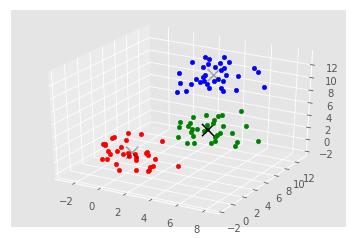

In [8]:
centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples=100, centers=centers, cluster_std=1.5)

ms = MeanShift()
print(X)
ms.fit(X)
labels = ms.labels_
print(labels)
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = list(10*"rgbckym")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
    
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], \
          marker="x", color="k", s=150, linewidths=5, zorder=10)

plt.show()

In [9]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body', 'name'], 1, inplace=True)
df.fillna(0, inplace=True)

In [18]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [19]:
df = handle_non_numerical_data(df)
df.drop(['ticket', 'home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [21]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
print(len(labels), labels)
print(len(cluster_centers), cluster_centers)

1309 [5 5 5 ... 0 0 0]
6 [[ 0.34575805  0.23783715 -0.12488653 -0.24331914 -0.28881537 -0.3528031
  -0.37113021  0.20177828 -0.29823533]
 [-1.54609786 -1.04663943  0.06383515  1.71605503  2.03163463  4.43427058
  -0.37222387 -0.7709375   2.46666438]
 [-1.54609786 -0.30074929  0.97374665 -0.47908676  0.1328818   9.26124543
   1.38017727 -1.81687688 -0.05454649]
 [-1.54609786  0.74349692  2.19644024  0.48128777  3.60016958  4.43513362
  -0.37835115 -0.59661427 -0.63129407]
 [ 0.84191642 -0.30074929 -1.35790158  0.48128777  9.95686385  0.70136971
  -0.44268755  0.62364835 -0.63129407]
 [-1.54609786  0.74349692 -0.27738167  2.40203684  1.86652569  4.44117492
  -0.42124208  0.62364835 -0.63129407]]


In [23]:
original_df['cluster_group'] = np.nan

In [30]:
original_df['cluster_group'] = labels.astype(float)
original_df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cluster_group
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0.0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0.0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0.0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0.0
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN,0.0


In [31]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[(original_df['cluster_group']==float(i))]
    
    survival_cluster = temp_df[ (temp_df['survived'] == 1) ]
    
    survival_rate = len(survival_cluster) / len(temp_df)
    
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.3713355048859935, 1: 1.0, 2: 1.0, 3: 0.14285714285714285, 4: 0.1, 5: 0.08333333333333333}


In [35]:
original_df[ original_df['cluster_group']==1 ]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cluster_group
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",1.0
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",1.0
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN,1.0
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN,1.0
32,1,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,8,NaN,"Youngstown, OH",1.0
35,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,4,NaN,"Cooperstown, NY",1.0
54,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",1.0
55,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",1.0
56,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,C,NaN,"Bryn Mawr, PA",1.0
57,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",1.0


In [37]:
original_df[ original_df['cluster_group']==5 ].describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,24.000000,24.000000,14.000000,24.000000,24.000000,24.000000,5.000000,24.0
mean,1.916667,0.083333,28.351193,3.875000,1.375000,137.376742,93.400000,5.0
std,1.017955,0.282330,22.775288,3.505431,0.923721,73.338377,37.792856,0.0
min,1.000000,0.000000,0.916700,0.000000,0.000000,46.900000,45.000000,5.0
25%,1.000000,0.000000,10.375000,1.000000,0.000000,69.550000,67.000000,5.0
50%,1.000000,0.000000,27.000000,2.000000,2.000000,151.550000,96.000000,5.0
75%,3.000000,0.000000,43.375000,8.000000,2.000000,214.069800,124.000000,5.0
max,3.000000,1.000000,67.000000,8.000000,2.000000,263.000000,135.000000,5.0


In [39]:
cluster_0 = (original_df [ original_df['cluster_group'] == 0])
cluster_0

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cluster_group
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0.0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",0.0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0.0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",0.0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0.0
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",0.0
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,0.0
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",0.0
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",0.0
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN,0.0


In [40]:
cluster_0_fc = cluster_0 [ cluster_0['pclass']==1 ]
cluster_0_fc.describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,263.0,263.000000,226.000000,263.000000,263.000000,263.000000,30.000000,263.0
mean,1.0,0.596958,39.991150,0.368821,0.201521,57.676441,172.566667,0.0
std,0.0,0.491444,14.064689,0.521391,0.471798,32.923184,84.511449,0.0
min,1.0,0.000000,4.000000,0.000000,0.000000,0.000000,16.000000,0.0
25%,1.0,0.000000,29.250000,0.000000,0.000000,29.700000,114.000000,0.0
50%,1.0,1.000000,39.500000,0.000000,0.000000,52.554200,173.500000,0.0
75%,1.0,1.000000,50.000000,1.000000,0.000000,79.025000,242.250000,0.0
max,1.0,1.000000,80.000000,2.000000,2.000000,153.462500,307.000000,0.0


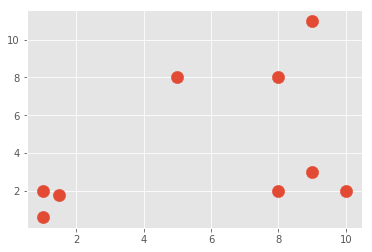

In [41]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = list(10*"grcbk")

In [56]:
class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)
                
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                    
            if optimized:
                break
                
        self.centroids = centroids

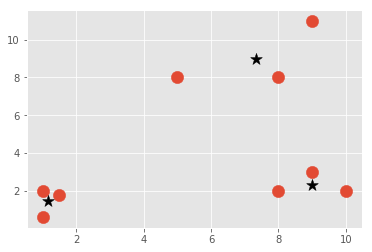

In [57]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
    
plt.show()

In [61]:
class Mean_Shift2:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            print(all_data_centroid)
            all_data_norm = np.linalg.norm(all_data_centroid)
            print(all_data_norm)
            self.radius = all_data_norm / self.radius_norm_step
            
        weights = [i for i in range(self.radius_norm_step)][::-1]
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
#                     if np.linalg.norm(featureset-centroid) < self.radius:
#                         in_bandwidth.append(featureset)
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                        
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth += to_add
                
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <self.radius:
                        to_pop.append(ii)
                        break
                        
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
#                 if not optimized:
#                     break
                    
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = (distances.index(min(distances)))
            
            self.classifications[classification].append(featureset)
            
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification

[5.83333333 4.26666667]
7.22718632817933


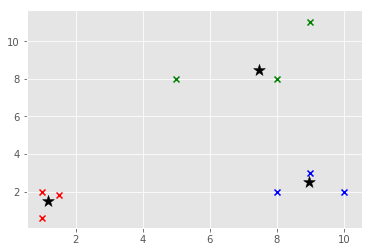

In [64]:
clf = Mean_Shift2()
clf.fit(X)

centroids = clf.centroids

colors = list(10*"rgbcky")

# plt.scatter(X[:,0], X[:,1], s=150)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
    
plt.show()

In [69]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=15, centers=3, n_features=2)

[-4.72894276  0.47521879]
4.75276051580332
{0: array([-10.24713787,  -2.76523811]), 1: array([-7.22070364,  7.06543209])}


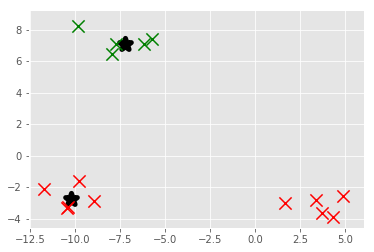

In [70]:
clf = Mean_Shift2()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150, linewidths = 5)

plt.show()